# Fake News Detection : NLP +LSTM

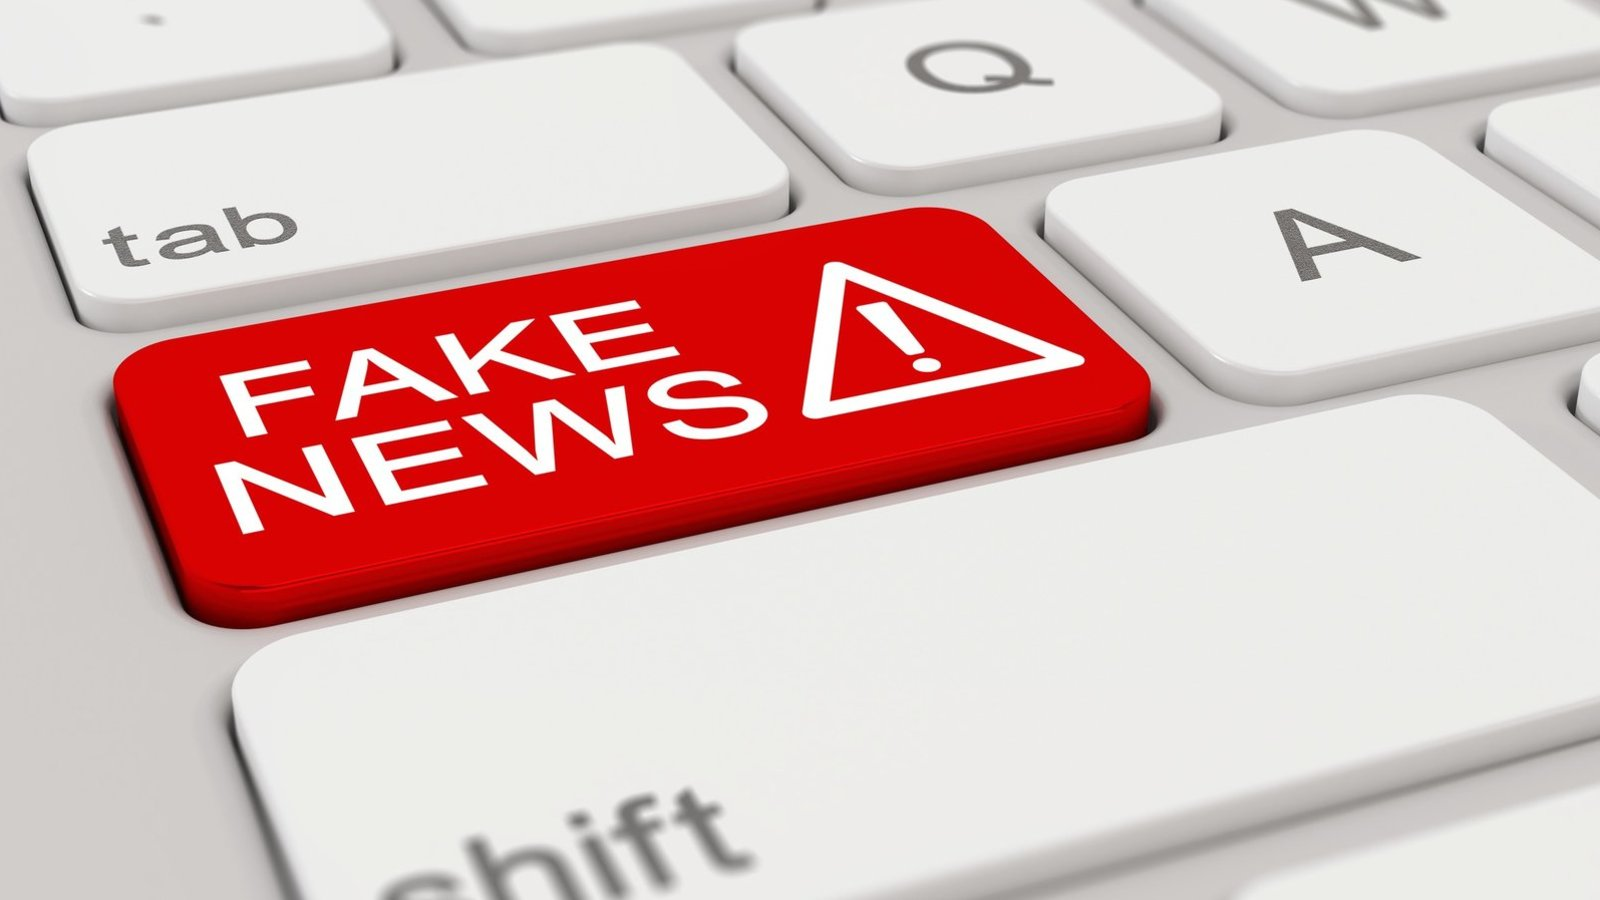

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\LENOVO\anaconda3\envs\deeplearningaz\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LENOVO\anaconda3\envs\deeplearningaz\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LENOVO\anaconda3\envs\deeplearningaz\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LENOVO\a

## 2. Load and Check Data Data

In [2]:
Real = pd.read_csv('True.csv')
Fake = pd.read_csv('Fake.csv')

In [3]:
Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
Real.shape

(21417, 4)

In [6]:
Fake.shape

(23481, 4)

In [7]:
Real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
Real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [10]:
Fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [11]:
#Add New column
Real['target'] = 1
Fake['target'] = 0 

In [12]:
Real.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
Fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
#Merging the 2 datasets
New_data = pd.concat([Real, Fake], ignore_index=True, sort=False)

In [15]:
New_data.shape

(44898, 5)

In [16]:
New_data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [17]:
New_data.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [18]:
# Count number of missing value in a column
New_data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [19]:
print(New_data["target"].value_counts())

0    23481
1    21417
Name: target, dtype: int64


## 3. Visualization

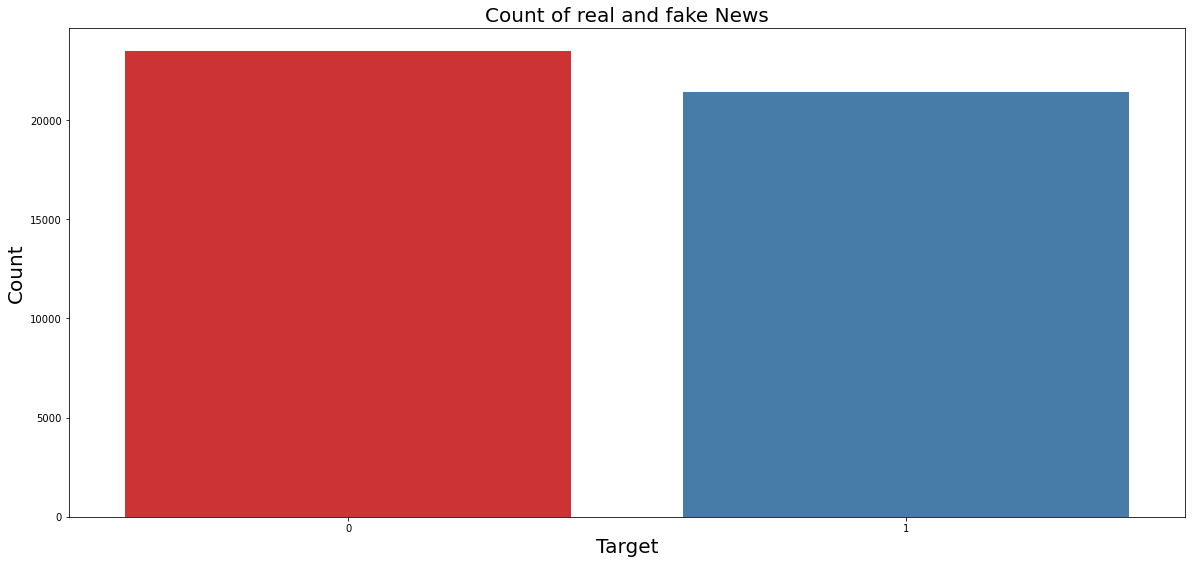

In [20]:
# Count of real and fake News
plt.figure(figsize=(20,9))
sns.countplot(New_data.target,palette="Set1");
plt.title("Count of real and fake News",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.xlabel("Target",fontsize = 20)
plt.show()

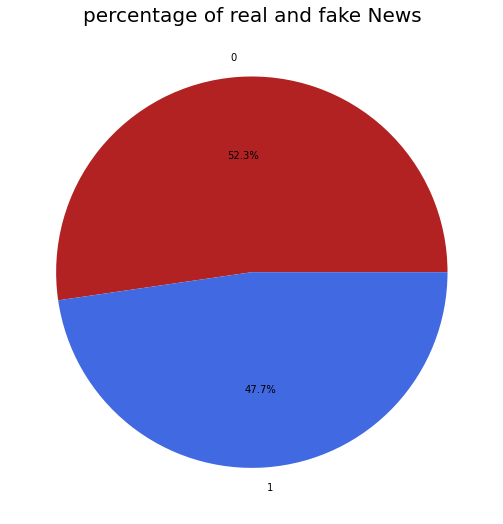

In [21]:
plt.figure(figsize=(20,9))
plt.title("percentage of real and fake News",fontsize = 20)
plt.pie(New_data["target"].value_counts().values,explode=[0,0],labels=New_data.target.value_counts().index, autopct='%1.1f%%',colors=['firebrick','royalblue'])
plt.show()

In [22]:
New_data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

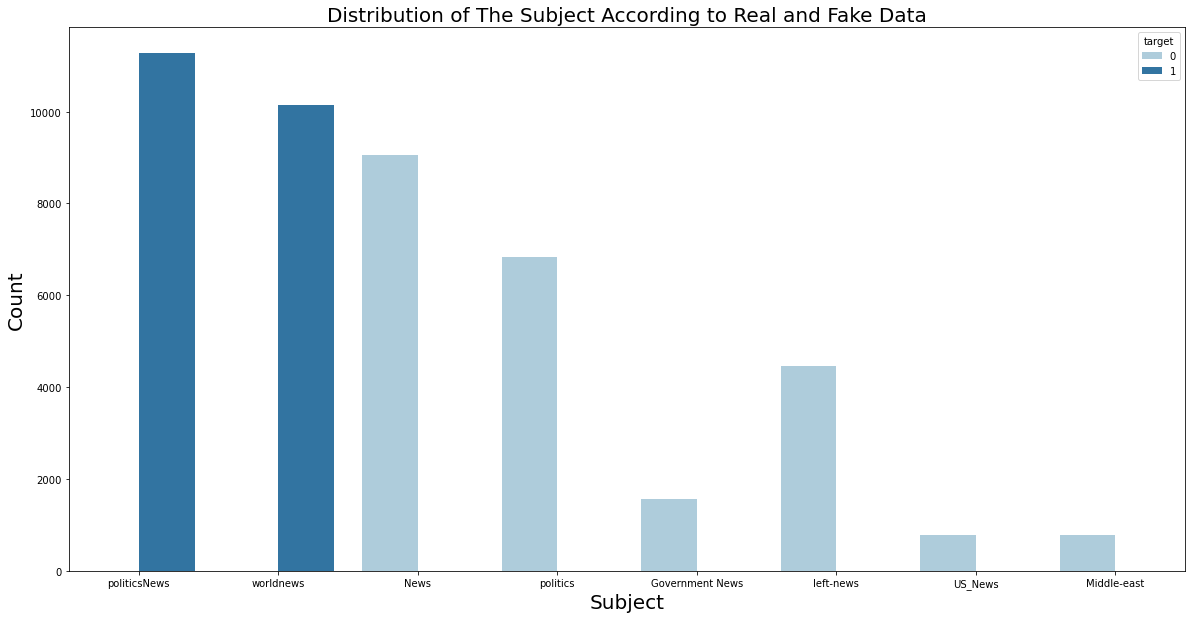

In [23]:
#Distribution of The Subject According to Real and Fake Data
plt.figure(figsize=(20, 10))
sns.countplot(x="subject",  hue='target', data=New_data, palette="Paired")
plt.xlabel("Subject",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.title("Distribution of The Subject According to Real and Fake Data",fontsize = 20)
plt.show()

## 4. Data Cleaning

In [24]:
New_data['text']= New_data['subject'] + " " + New_data['title'] + " " + New_data['text']
del New_data['title']
del New_data['subject']
del New_data['date']
New_data.head()

,text,target
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [25]:
First_text= New_data['text'][0]
First_text

'politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional incr

### 4.1 Removal of HTML Contents

In [26]:
from bs4 import BeautifulSoup

In [27]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(First_text, "html.parser")
First_text = soup.get_text()
First_text

'politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional incr

### 4.2 Removal of Punctuation Marks and Special Characters

In [28]:
First_text = re.sub('\[[^]]*\]', ' ', First_text) # replaces special characters with spaces
First_text = re.sub('[^a-zA-Z]',' ',First_text)  # replaces non-alphabets with spaces
First_text = First_text.lower() # Converting from uppercase to lowercase
First_text

'politicsnews as u s  budget fight looms  republicans flip their fiscal script washington  reuters    the head of a conservative republican faction in the u s  congress  who voted this month for a huge expansion of the national debt to pay for tax cuts  called himself a  fiscal conservative  on sunday and urged budget restraint in       in keeping with a sharp pivot under way among republicans  u s  representative mark meadows  speaking on cbs   face the nation   drew a hard line on federal spending  which lawmakers are bracing to do battle over in january  when they return from the holidays on wednesday  lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues  such as immigration policy  even as the november congressional election campaigns approach in which republicans will seek to keep control of congress  president donald trump and his republicans want a big budget increase in military spending  while democrats also want proportional incr

### 4.3 Removal of Stopwords

In [29]:
#nltk.download()

In [30]:
#nltk.download('punkt')

In [31]:
#nltk.download("stopwords")    

In [32]:
#from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [33]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [34]:
# we can use tokenizer instead of split
First_text_tokens = word_tokenize(First_text)
First_text_tokens

['politicsnews',
 'as',
 'u',
 's',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'their',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'the',
 'head',
 'of',
 'a',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 'u',
 's',
 'congress',
 'who',
 'voted',
 'this',
 'month',
 'for',
 'a',
 'huge',
 'expansion',
 'of',
 'the',
 'national',
 'debt',
 'to',
 'pay',
 'for',
 'tax',
 'cuts',
 'called',
 'himself',
 'a',
 'fiscal',
 'conservative',
 'on',
 'sunday',
 'and',
 'urged',
 'budget',
 'restraint',
 'in',
 'in',
 'keeping',
 'with',
 'a',
 'sharp',
 'pivot',
 'under',
 'way',
 'among',
 'republicans',
 'u',
 's',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'on',
 'cbs',
 'face',
 'the',
 'nation',
 'drew',
 'a',
 'hard',
 'line',
 'on',
 'federal',
 'spending',
 'which',
 'lawmakers',
 'are',
 'bracing',
 'to',
 'do',
 'battle',
 'over',
 'in',
 'january',
 'when',
 'they',
 'return',
 'from',
 'the',
 'holidays',
 'on',
 'wednesday',
 'lawmakers

In [36]:
#Remove stopwords
First_text = [ word for word in First_text_tokens if not word in set(stopwords.words("english"))]

In [37]:
First_text 

['politicsnews',
 'u',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'u',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'u',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want

### 4.4 Lemmatization

In [ ]:
Lemmatization to bring back multiple forms of same word to their common root like 'spending', 'spends' into 'spend'.

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [41]:
lemma = nltk.WordNetLemmatizer()
First_text = [ lemma.lemmatize(word) for word in First_text] 

In [42]:
First_text

['politicsnews',
 'u',
 'budget',
 'fight',
 'loom',
 'republican',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'u',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cut',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republican',
 'u',
 'representative',
 'mark',
 'meadow',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmaker',
 'bracing',
 'battle',
 'january',
 'return',
 'holiday',
 'wednesday',
 'lawmaker',
 'begin',
 'trying',
 'pas',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issue',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaign',
 'approach',
 'republican',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republican',
 'want',
 'big',
 '

In [43]:
First_text = " ".join(First_text)
First_text

'politicsnews u budget fight loom republican flip fiscal script washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadow chairman small influential house free

### 4.5 Clean all the data

In [44]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [45]:
#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

In [46]:
# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [47]:
#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

In [48]:
#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

In [50]:
#Apply function on text column
New_data['text']=New_data['text'].apply(cleaning)
New_data.head()

,text,target
0,politicsnews u budget fight loom republican fl...,1
1,politicsnews u military accept transgender rec...,1
2,politicsnews senior u republican senator let m...,1
3,politicsnews fbi russia probe helped australia...,1
4,politicsnews trump want postal service charge ...,1


## 5.Visulaization with New_data

In [52]:
!pip install wordcloud

In [53]:
from wordcloud import WordCloud,STOPWORDS

### 5.1 WordCloud for Real News

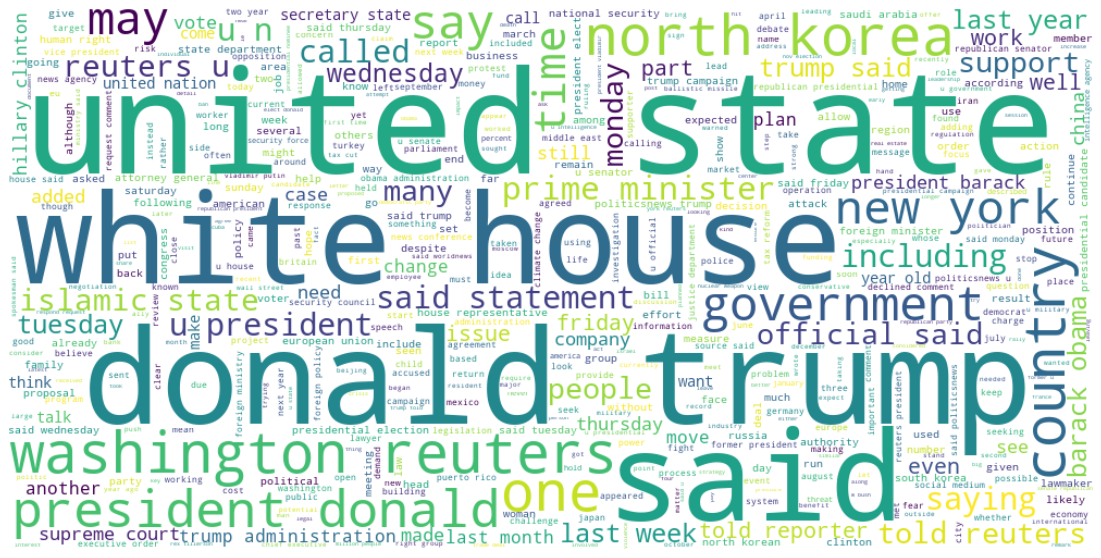

In [57]:
plt.figure(figsize = (20,10))
Real= WordCloud(background_color = 'white',max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(New_data[New_data.target == 1].text))
plt.axis("off")
plt.imshow(Real , interpolation = 'bilinear')
plt.show()

### 5.2  WordCloud for Fake News

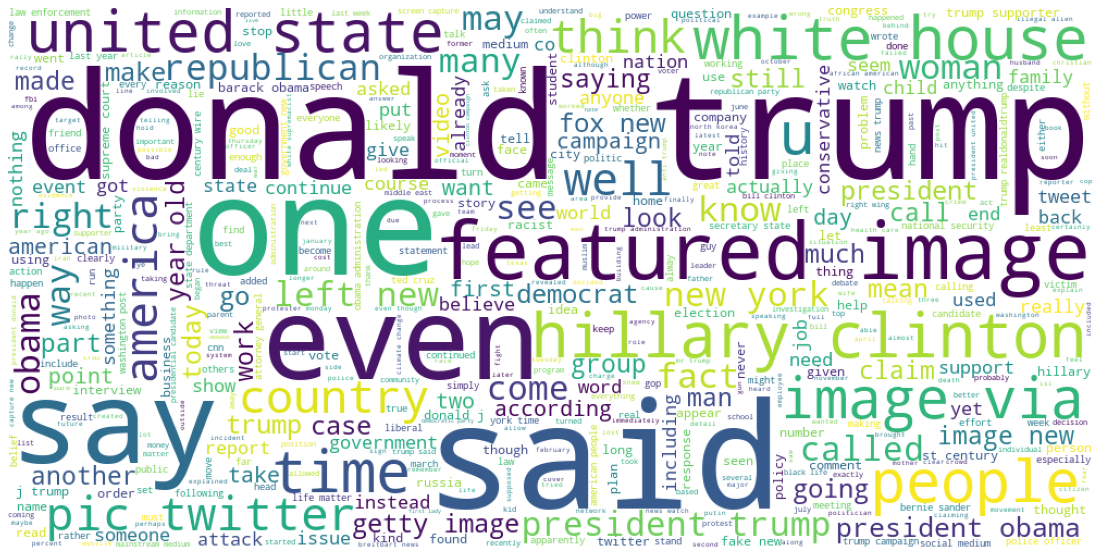

In [60]:
plt.figure(figsize = (20,10))
Fake = WordCloud(background_color = 'white',max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(New_data[New_data.target == 0].text))
plt.axis("off")
plt.imshow(Fake)
plt.show()

### 5.3 Number of words in each text

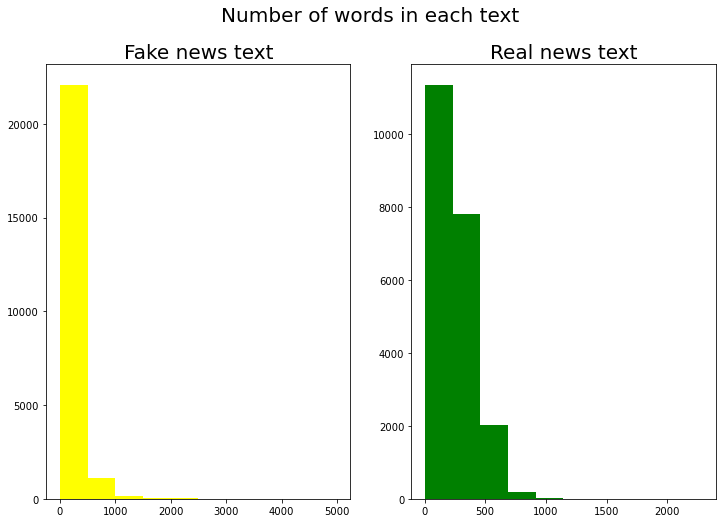

In [65]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=New_data[New_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='Yellow')
ax1.set_title('Fake news text',fontsize=20)
text_len=New_data[New_data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='Green')
ax2.set_title('Real news text',fontsize=20)
fig.suptitle('Number of words in each text',fontsize=20)
plt.show()

### Around 250 words are most common in fake news category.
### 500 words are most common in real news category 

## 6. N-Gram Analysis

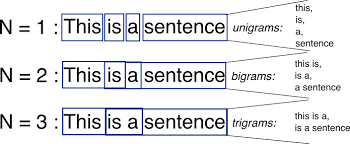

In [69]:
texts = ' '.join(New_data['text'])

In [70]:
string = texts.split(" ")

In [88]:
def N_Gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (20,10))
    plt.xlabel("Count",fontsize=25)
    plt.ylabel("Word",fontsize=25)
    return sns.barplot(x='count',y='word', data=n_gram_df)

### 6.1 Unigram Analysis

           word   count
0      (trump,)  149603
1       (said,)  133030
2          (u,)   78516
3      (state,)   62726
4  (president,)   58790


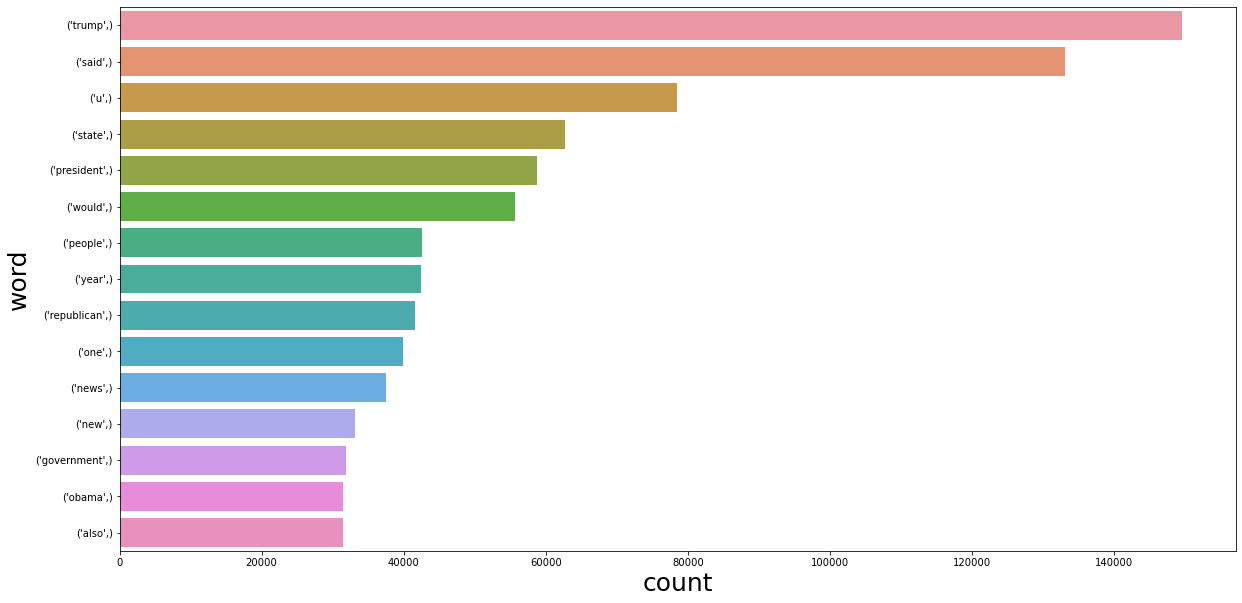

In [89]:
N_Gram(string,1)

### 6.2 Bigram Analysis

                 word  count
0     (donald, trump)  25203
1     (united, state)  18943
2      (white, house)  16296
3  (hillary, clinton)  10217
4         (new, york)   9305


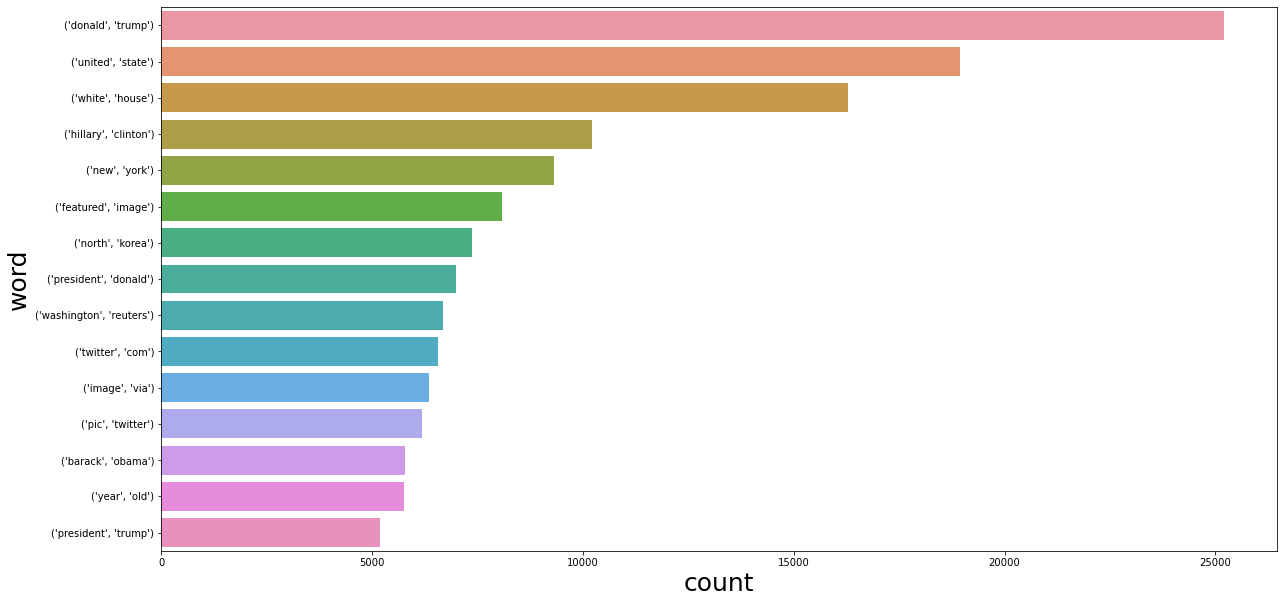

In [90]:
N_Gram(string,2)

### 6.3 Trigram Analysis

                         word  count
0  (president, donald, trump)   6830
1         (pic, twitter, com)   6185
2      (featured, image, via)   6029
3  (president, barack, obama)   3911
4        (getty, image, news)   3575


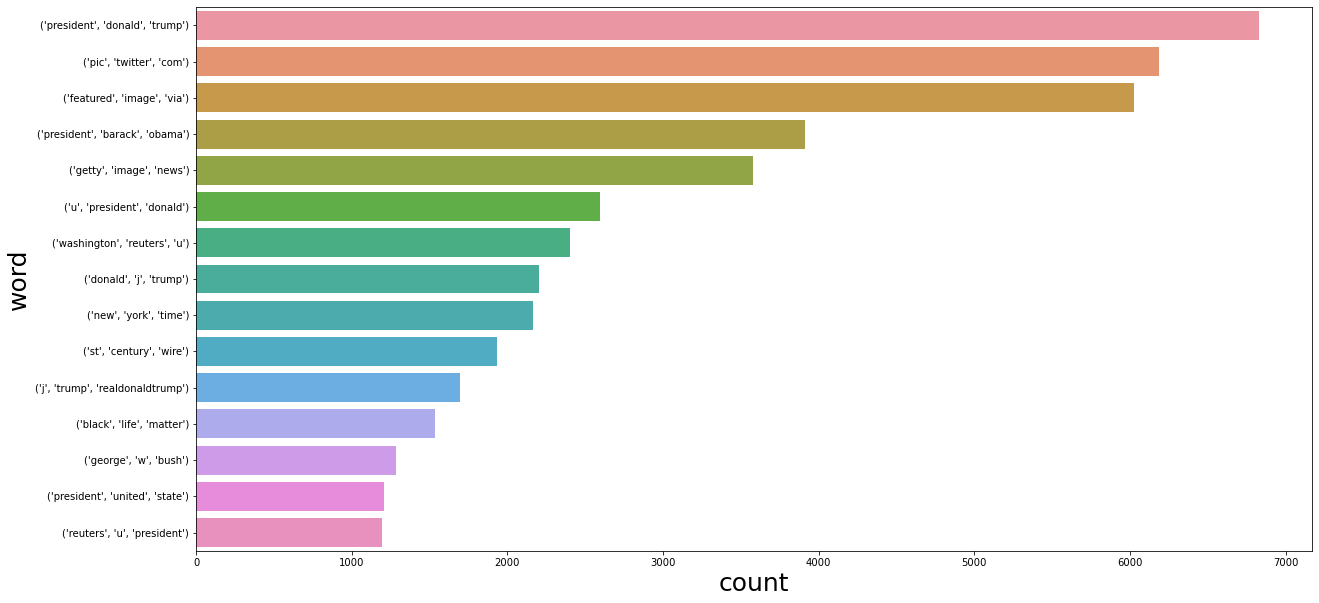

In [91]:
N_Gram(string,3)

## 7.Modeling

In [92]:
# Divide our Dataset into 2 parts: a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(New_data['text'], New_data['target'], random_state=0)

### Tokenizing
Tokenizing Text -> Repsesenting each word by a number

In [93]:
max_features = 10000
max_len = 300

**1) fit_on_texts :** Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2

**2) texts_to_sequences :** Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. 

In [94]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [95]:
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=max_len)

In [96]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=max_len)

### Training LSTM Model


In [97]:
batch_size = 256
epochs = 10
embed_size = 100

In [98]:
#Initialising the model
model = Sequential()

In [100]:
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=max_len, trainable=False))

In [101]:
# Add the first LSTM layer with 128 internal units.
#dropout to prevent overfitting
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))

In [102]:
# Add the second LSTM layer with 64 internal units.
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))

In [103]:
# Add a Dense layer with 32 units.
model.add(Dense(units = 32 , activation = 'relu'))

In [104]:
# Adding the output layer
model.add(Dense(1, activation='sigmoid'))

In [105]:
# Compiling the model
# loss='binary_crossentropy' : classification problem
# optimizer : Adam
# metrics : accuracy
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [107]:
#Fitting the model to the Training set
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)


Train on 23571 samples, validate on 10102 samples
Epoch 1/10
23571/23571 [==============================] - 360s 15ms/step - loss: 0.4513 - accuracy: 0.7785 - val_loss: 0.2949 - val_accuracy: 0.8663
Epoch 2/10
23571/23571 [==============================] - 363s 15ms/step - loss: 0.3342 - accuracy: 0.8514 - val_loss: 0.2433 - val_accuracy: 0.9020
Epoch 3/10
23571/23571 [==============================] - 360s 15ms/step - loss: 0.2674 - accuracy: 0.8911 - val_loss: 0.2391 - val_accuracy: 0.9027
Epoch 4/10
23571/23571 [==============================] - 360s 15ms/step - loss: 0.2069 - accuracy: 0.9179 - val_loss: 0.1679 - val_accuracy: 0.9428
Epoch 5/10
23571/23571 [==============================] - 374s 16ms/step - loss: 0.0758 - accuracy: 0.9728 - val_loss: 0.0507 - val_accuracy: 0.9784
Epoch 6/10
23571/23571 [==============================] - 370s 16ms/step - loss: 0.0459 - accuracy: 0.9834 - val_loss: 0.0453 - val_accuracy: 0.9837
Epoch 7/10
23571/23571 [==============================]

## Analysis After Training

In [109]:
print("Training Data :Accuracy - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Testing Data :Accuracy - " , model.evaluate(X_test,y_test)[1]*100 , "%")

33673/33673 [==============================] - 373s 11ms/step
Training Data :Accuracy -  98.85962009429932 %
11225/11225 [==============================] - 122s 11ms/step
Testing Data :Accuracy -  98.82405400276184 %


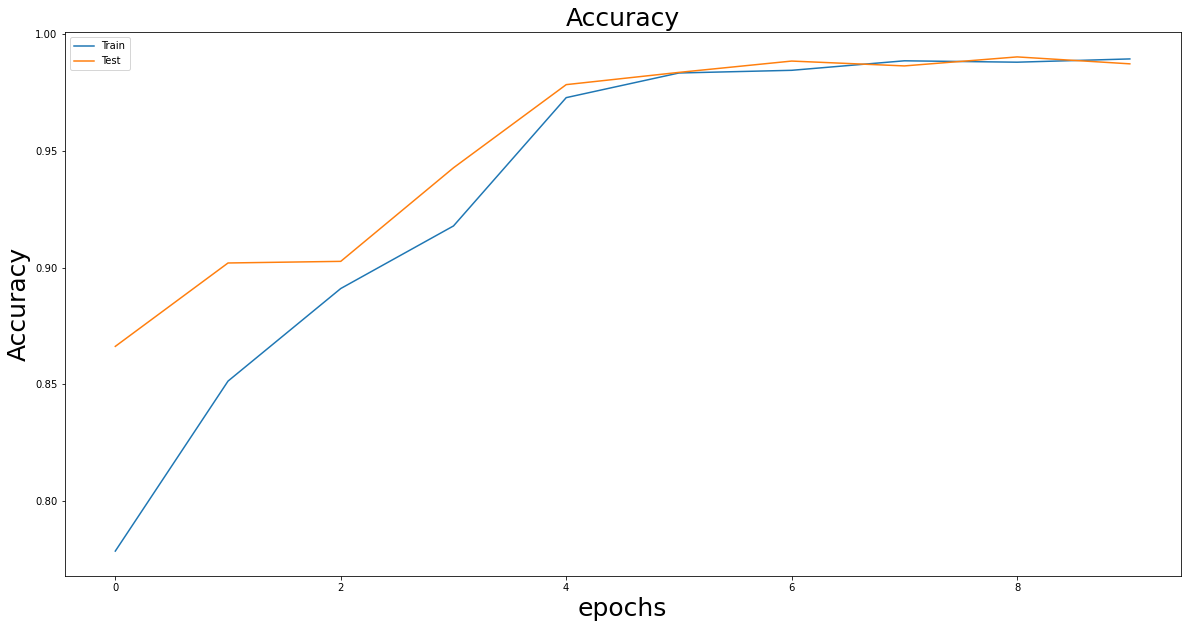

In [111]:
plt.figure(figsize = (20,10))
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy",fontsize=25)
plt.ylabel("Accuracy",fontsize=25)
plt.xlabel("epochs",fontsize=25)
plt.legend()
plt.show()

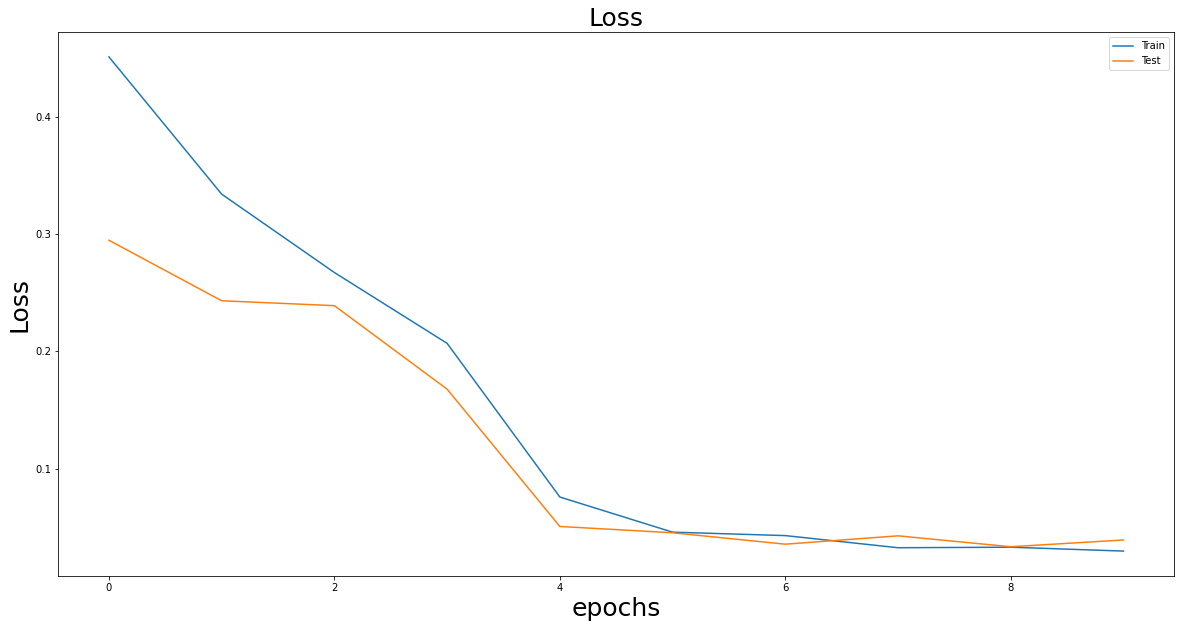

In [113]:
plt.figure(figsize = (20,10))
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss",fontsize=25)
plt.ylabel("Loss",fontsize=25)
plt.xlabel("epochs",fontsize=25)
plt.legend()
plt.show()

## 8.Testing

In [114]:
pred = model.predict_classes(X_test)
print(classification_report(y_test, pred, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      5858
        Real       0.98      1.00      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

